In [94]:
# 9,CongestionWindow
# 17,SmoothedRTT
# 20,RetransmissionTimeout
# 21,SocketSendBufferSize
# 22,SocketSendBufferBytes
# 23,SocketReceiveBufferSize
# 24,SocketReceiveBufferBytes
# 25,UnacknowledgedBytes

# # With ECN and no ECN

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.pyplot as plt
# from gym import wrappers
# from gym import spaces
import math
import random
import re
import os
import sys
import seaborn as sns

# import gym
# import tensorflow as tf
# from tensorflow.keras import layers
# col = ['Direction', 'Hash', 'Time', 'LocalIP', 'LocalPort', 'ForeignIP', 'ForeignPort', 'SlowStartThreshold', 'CongestionWindow', 'BandwidthControlledWindow', 'SendingWindow', 'ReceiveWindow', 'SendingWindowScalingFactor', 'ReceiveWindowScalingFactor', 'TCPFiniteStateMachine',
#        'MaximumSegmentSize', 'SmoothedRTT', 'SACKEnabled', 'TCPFlags', 'RetransmissionTimeout', 'SocketSendBufferSize', 'SocketSendBufferBytes', 'SocketReceiveBufferSize', 'SocketReceiveBufferBytes', 'UnacknowledgedBytes', 'ReassemblyQueue', 'Flowid', 'Flowtype']


In [96]:
col = ['Direction', 
        'Time', 
        'LocalIP', 
        'LocalPort',
        'ForeignIP',
        'ForeignPort', 
        'SlowStartThreshold', 
        'CongestionWindow', 
        'BandwidthControlledWindow', 
        'SendingWindow', 
        'ReceiveWindow', 
        'SendingWindowScalingFactor', 
        'ReceiveWindowScalingFactor', 
        'TCPFiniteStateMachine',
        'MaximumSegmentSize', 
        'SmoothedRTT', 
        'SACKEnabled', 
        'TCPFlags', 
        'RetransmissionTimeout', 
        'SocketSendBufferSize', 
        'SocketSendBufferBytes', 
        'SocketReceiveBufferSize', 
        'SocketReceiveBufferBytes', 
        'UnacknowledgedBytes', 
        'ReassemblyQueue', 
        'Flowid', 
        'Flowtype']

In [97]:
import re

def contains_1_or_2(input_string):
    if '2' in input_string:
        return 2
    elif '1' in input_string:
        return 1
    else:
        return 0

# Example usage:
test_string = "abc123xyz"
result = contains_1_or_2(test_string)
print("Result:", result)


Result: 2


In [98]:
# plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100, 'font.size':16})

In [99]:
def functionfilenameandpath(path='./', extension='.log'):
    filepaths = []
    filenames = []

    for root, _, files_list in os.walk(path):
        for file_name in files_list:
            if file_name.endswith(extension):
                file_name_path = os.path.join(root, file_name)
                filenames.append(file_name)
                filepaths.append(file_name_path)

    return filenames, filepaths

In [100]:
folderpath="./datatest1"
filenames,filepaths=functionfilenameandpath(folderpath,'.log')

filepaths.sort()
filenames.sort()
print(filenames)

['fq_codel_10Mbps_1ms_ecn.siftr.log', 'fq_codel_1Mbps_1ms_ecn.siftr.log', 'fq_pie_10Mbps_1ms_ecn.siftr.log', 'fq_pie_1Mbps_1ms_ecn.siftr.log', 'l4s_10Mbps_1ms_ecn.siftr.log', 'l4s_1Mbps_1ms_ecn.siftr.log']


In [101]:
# for index in range(len(filenames)):
#     print("..................>>>>>>>>>>>>>>>>>")
#     print(filenames[index])
#     print(contains_1_or_2(filenames[index]))
#     print("..................>>>>>>>>>>>>>>>>>")

In [102]:
def remove_outliers_iqr(df, column_name):
    """
    Remove outliers from a specified column in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame.
    column_name (str): The name of the column from which to remove outliers.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

fq_codel_10Mbps_1ms_ecn.siftr.log
fq_codel_1Mbps_1ms_ecn.siftr.log
fq_pie_10Mbps_1ms_ecn.siftr.log
fq_pie_1Mbps_1ms_ecn.siftr.log
l4s_10Mbps_1ms_ecn.siftr.log
l4s_1Mbps_1ms_ecn.siftr.log
count    635.000000
mean     464.157726
std      130.285313
min      178.437000
25%      399.375000
50%      474.062000
75%      553.281000
max      761.250000
Name: SmoothedRTT, dtype: float64
1945    270.000
1948    270.000
1961    267.500
1962    267.500
1984    237.812
Name: SmoothedRTT, dtype: float64
5576    250.625
5584    260.625
5586    260.625
5587    260.625
5592    230.625
Name: SmoothedRTT, dtype: float64
<class 'pandas.core.frame.DataFrame'>
<class 'str'>


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


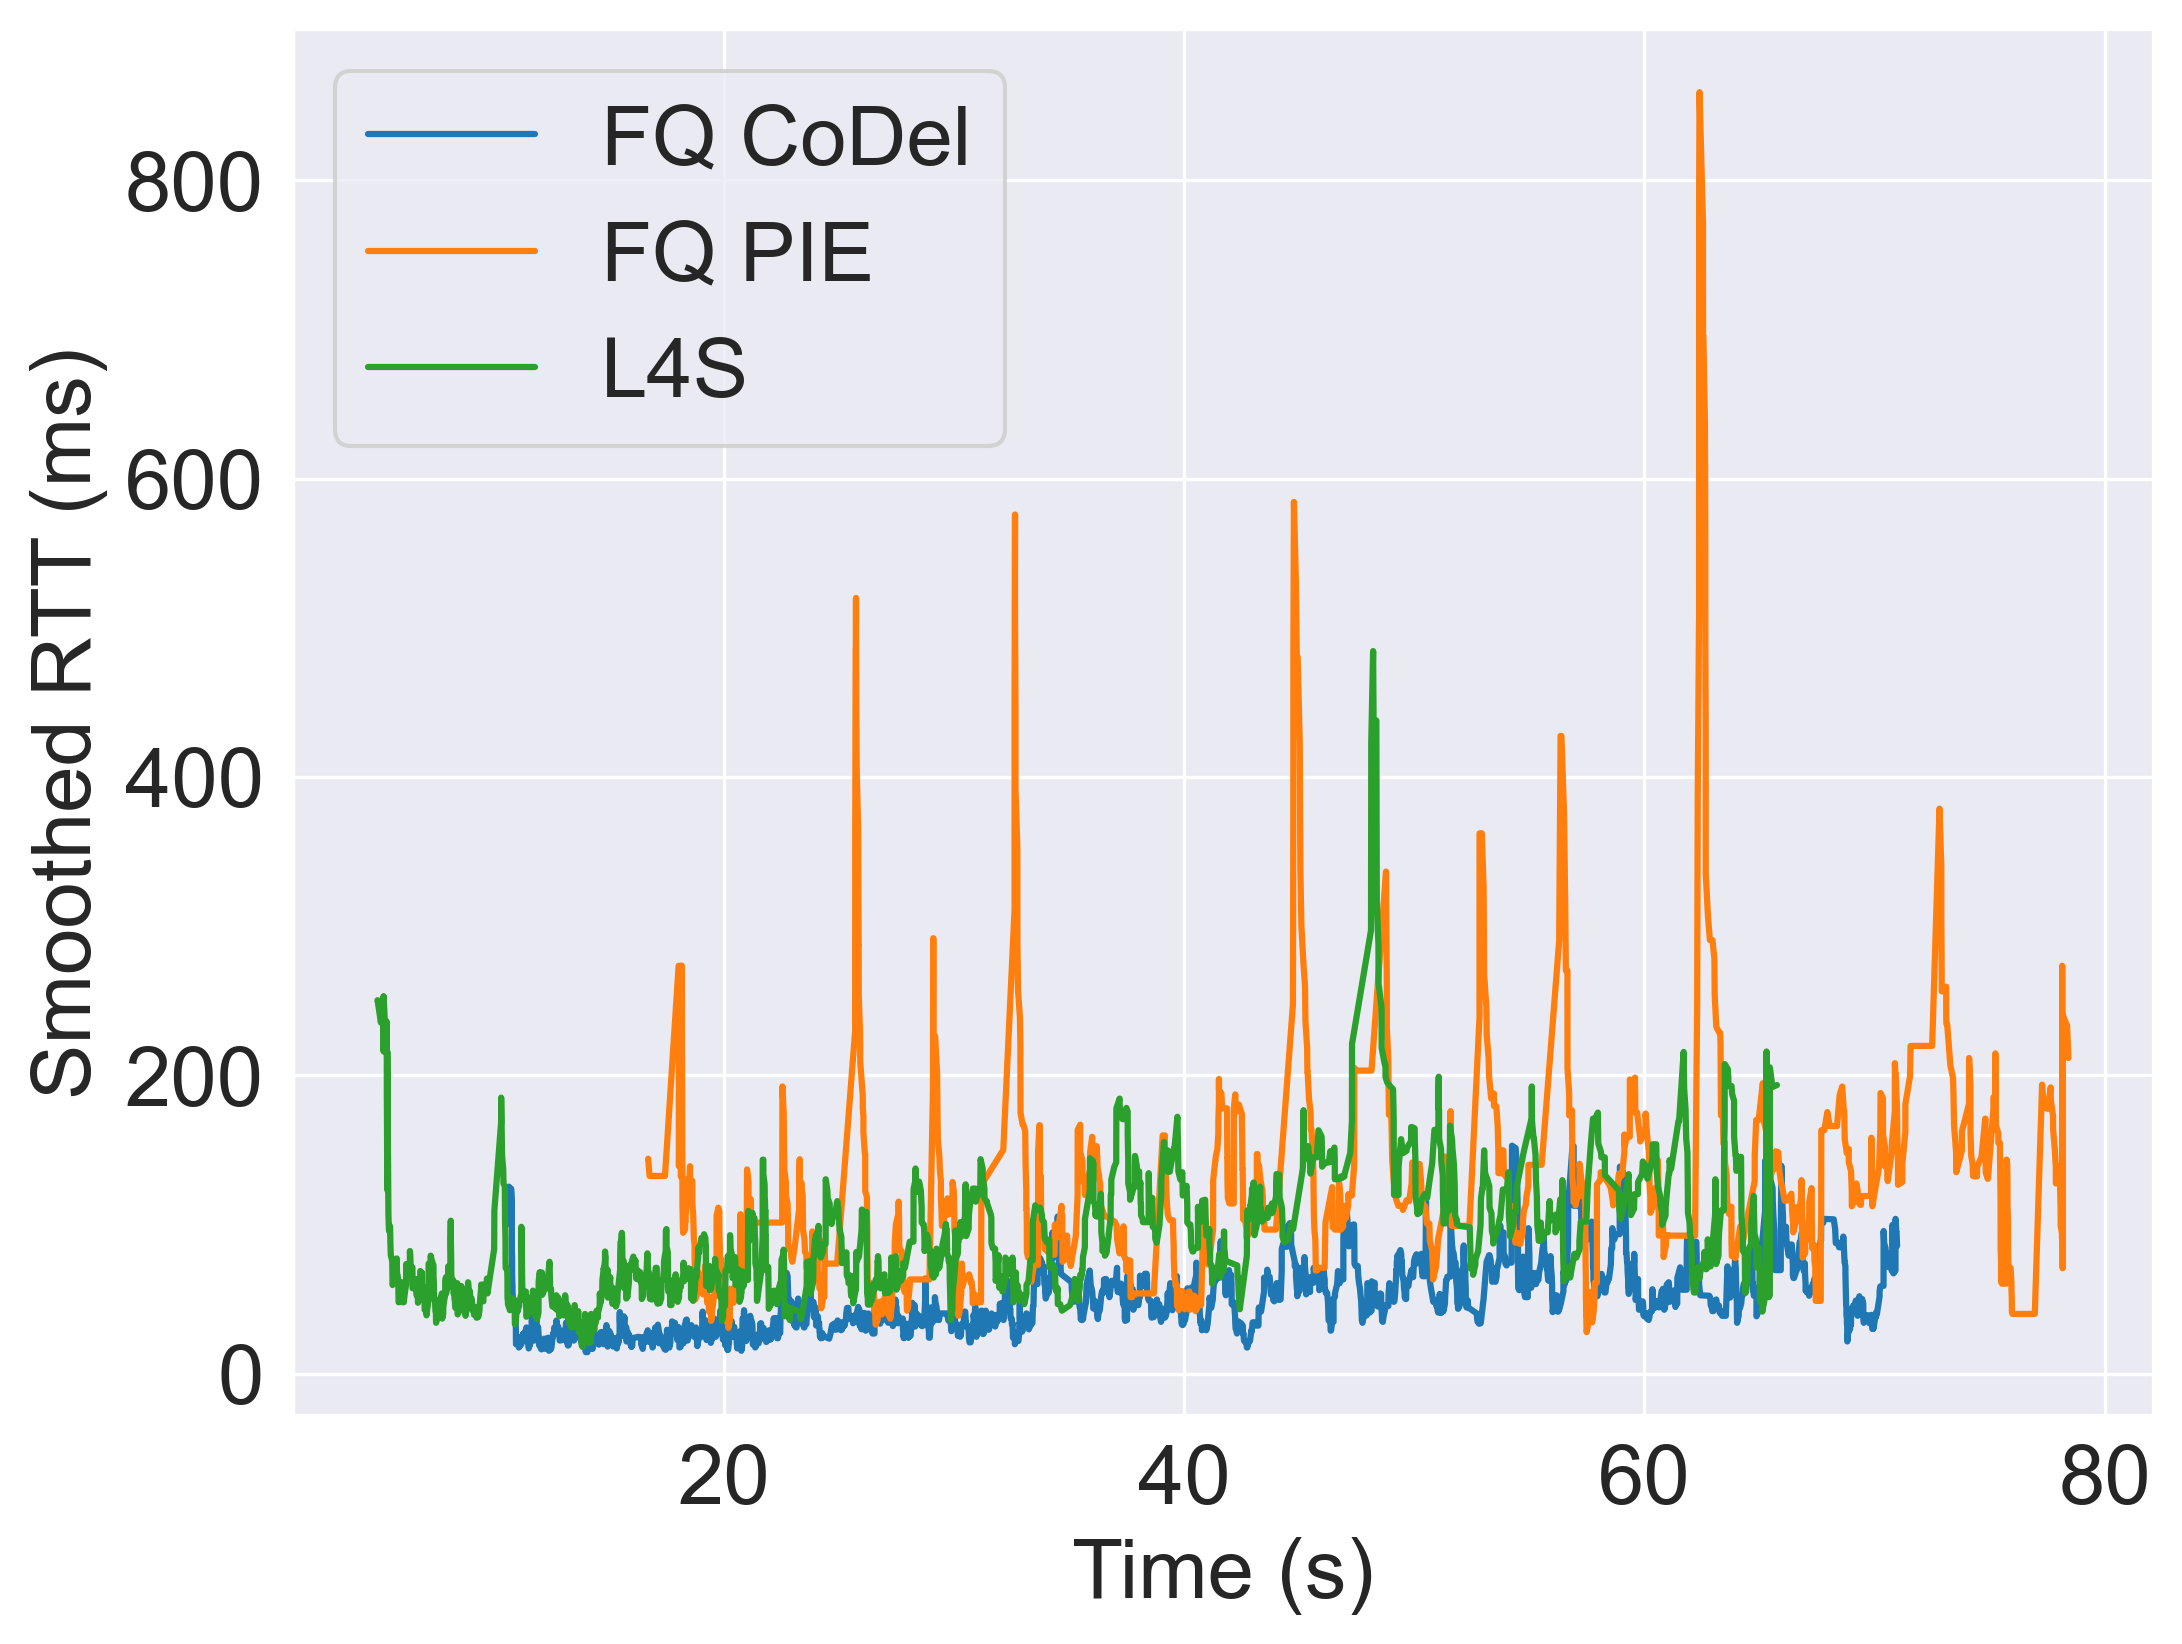

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


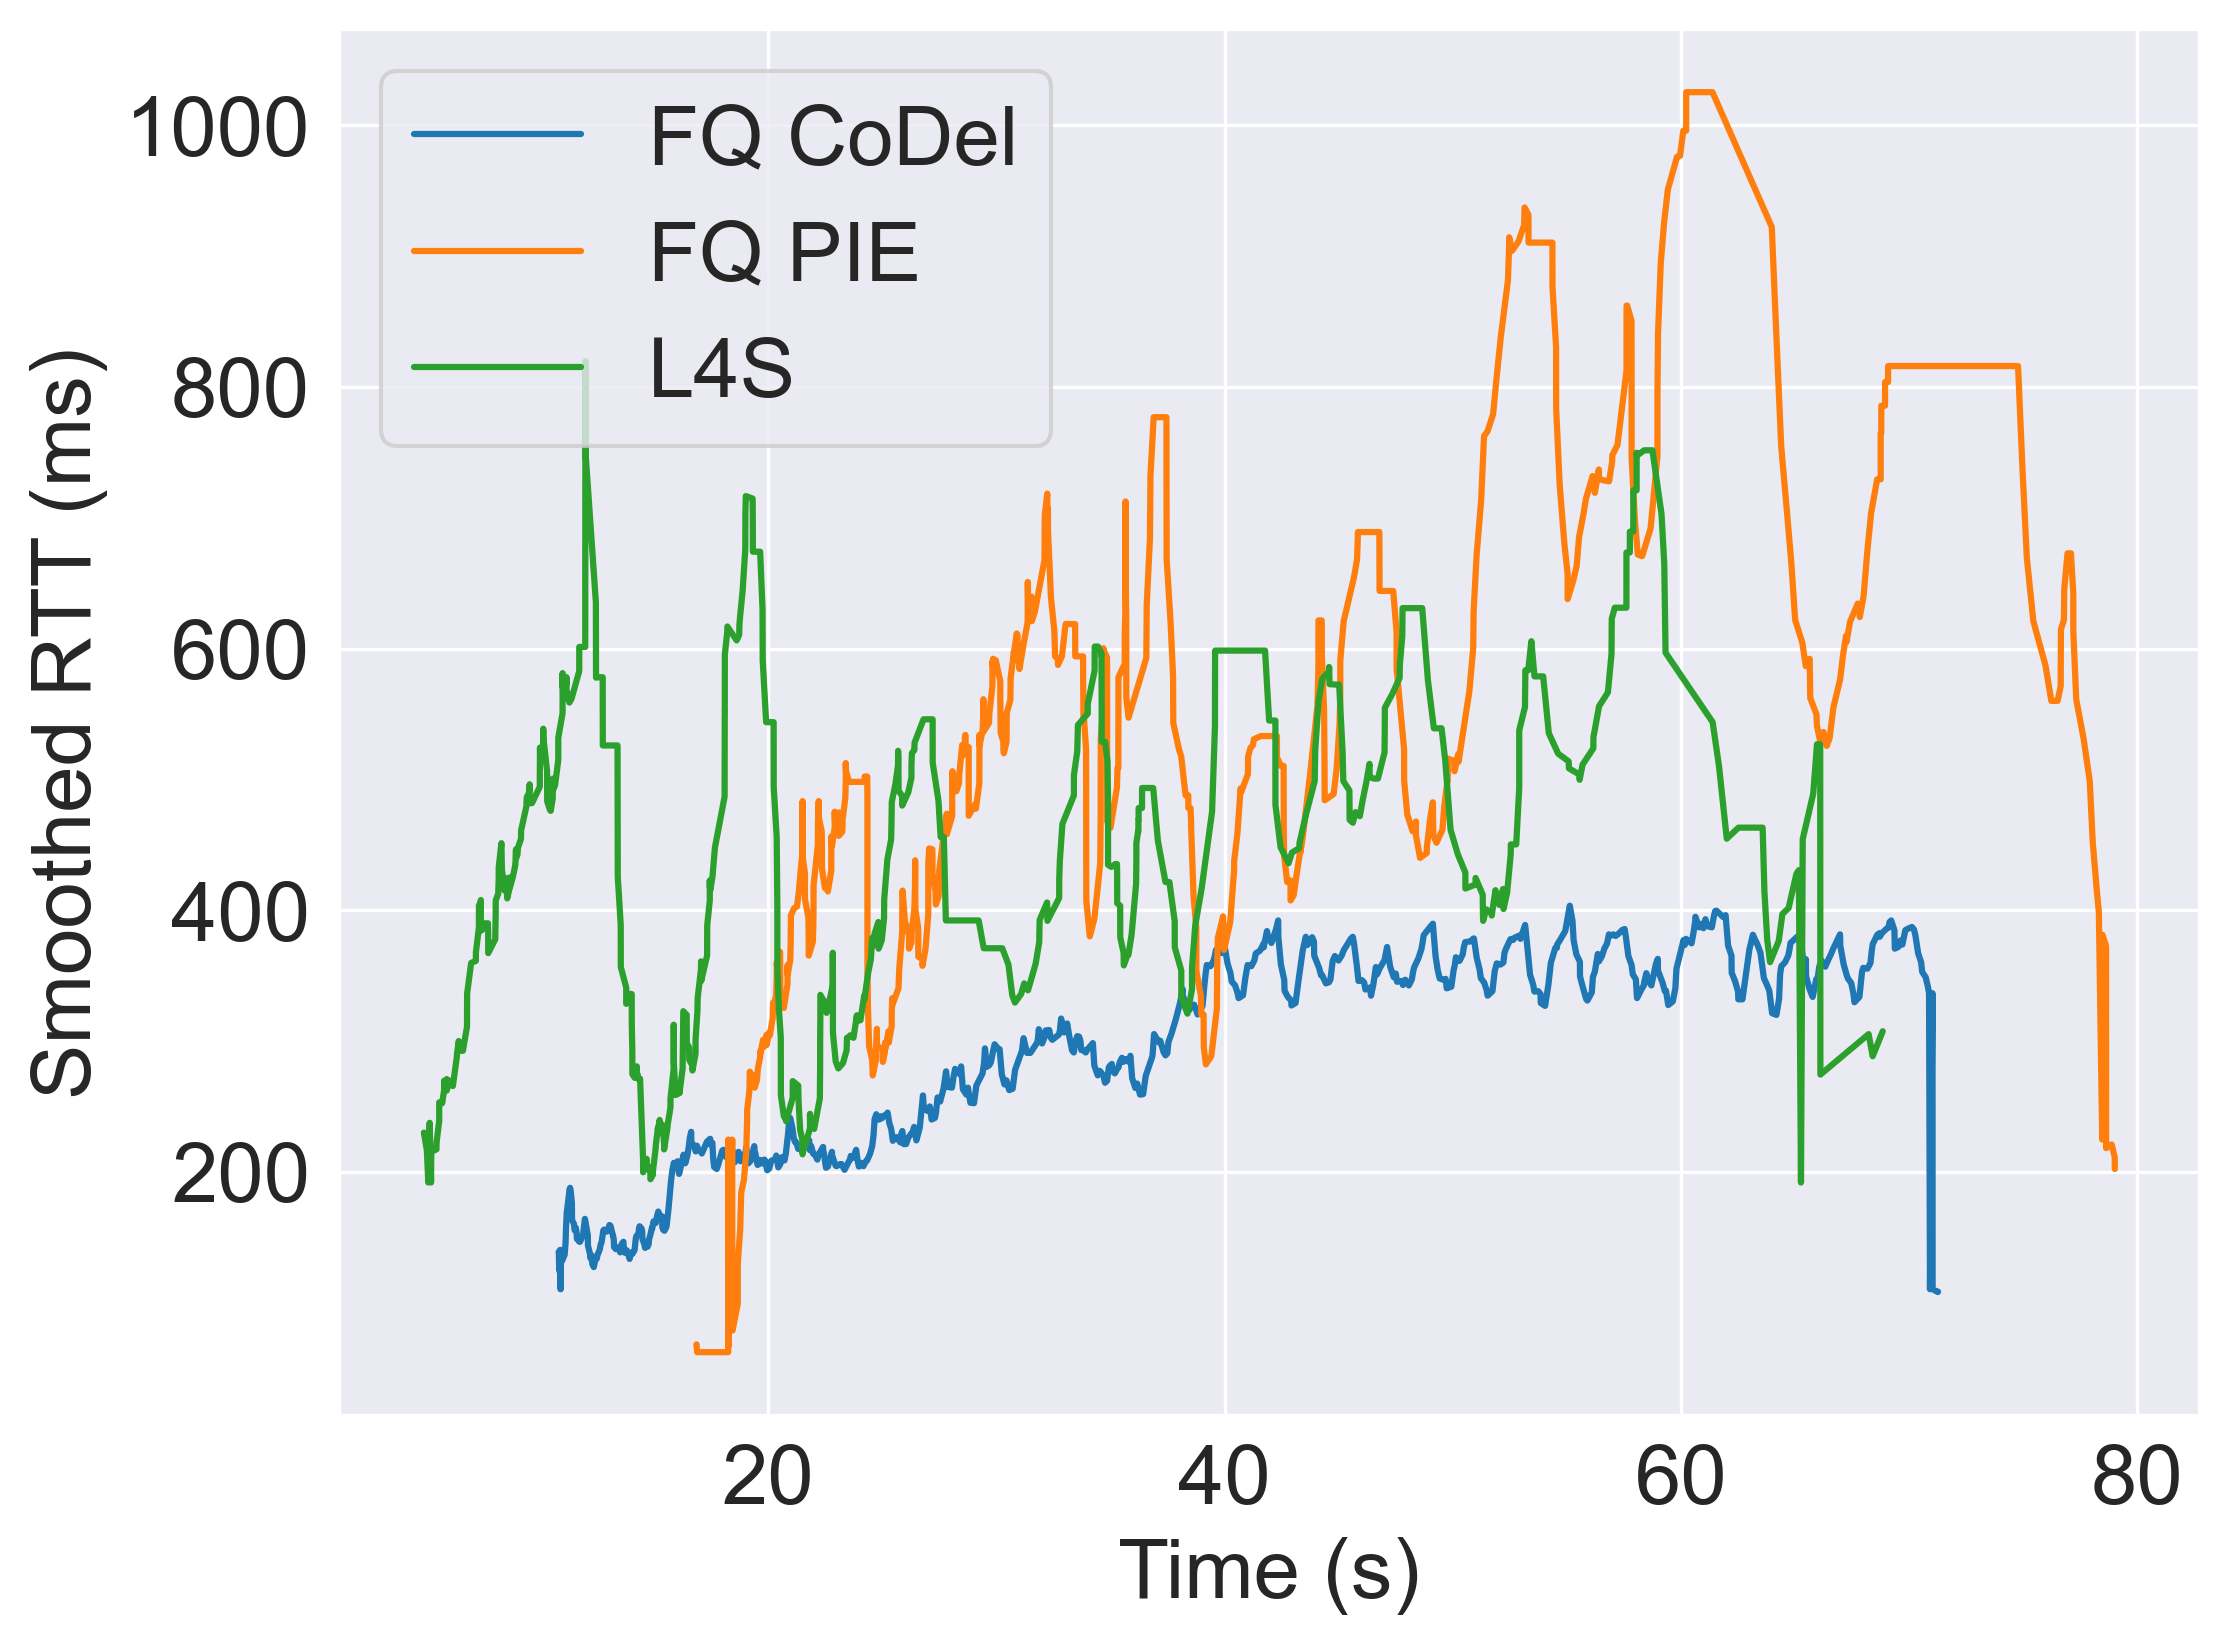

In [103]:
dataframe_list=[]
data_filename_list=[]
data_dict={}

df_list = {}
for index in range(len(filenames)):
    # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
    data = []
    with open("./datatest1/"+filenames[index], 'r') as f:
        # store the data
        for line in f:
            tem = re.sub(r'\s', '', line)
            data.append(tem.split(','))
    # remove file line of data
    print(filenames[index])
    data.pop(0)
    data.pop(len(data)-1)



    df = pd.DataFrame(data, columns=col)

    df=df[df['Direction']=='o']

    # congestion window to int
    df = df.astype({'CongestionWindow': 'int32'})
    
    # Convert 'Time' column to float64 type
    df['Time'] = df['Time'].astype('float64')

    # Subtract the first time entry from all the entries in 'Time' column
    df['Time'] = df['Time'] - df['Time'].iloc[0]



    # remove rows that congestion window bigger than 70000
    # df = df[df['CongestionWindow'].astype(int) < 70000]
    # RTT divide by tcp_rtt_scale * hz
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
    df['SmoothedRTT'] = df['SmoothedRTT'] / (1000)
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')

    
    # if "10Mbps" in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,200)
    # elif "1Mbps" in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,200)




    # first path ForeignPort = 5101
    dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

    # second path localip = 5102
    dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

    # third path ForeignPort = 5101
    dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

    # fourth path localip = 5102
    dfPath4 = df.loc[(df['ForeignPort'] == '5104')]

    df_list[filenames[index]] = [dfPath1]
    

print(dfPath4['SmoothedRTT'].describe())
print(dfPath4['SmoothedRTT'].head(5))
print(dfPath4['SmoothedRTT'].tail(5))

# Darker color-blind-friendly palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# Different line styles and markers
line_styles = ['-', '--', '-.', ':']
#line_styles = ['-', '-', '-', '-']
markers = ['o', 's', '^', 'D']



# Plot Smoothed RTT vs Time
#plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
sns.set_style("darkgrid")  # Set the style to darkgrid



# plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
#                 color=colors[0])
# plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
#                 color=colors[1])
# plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
#                 color=colors[2])
# plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
#                 color=colors[3])


dfaqm1 = df_list[filenames[0]][0]
dfaqm2 = df_list[filenames[2]][0]
dfaqm3 = df_list[filenames[4]][0]

print(type(dfaqm1))
print(type(filenames[0]))

label_name = ["FQ CoDel", "FQ PIE", "L4S"]

plt.plot(dfaqm1['Time'], dfaqm1['SmoothedRTT'], label=label_name[0],color=colors[0])
plt.plot(dfaqm2['Time'], dfaqm2['SmoothedRTT'], label=label_name[1],color=colors[1])
plt.plot(dfaqm3['Time'], dfaqm3['SmoothedRTT'], label=label_name[2],color=colors[2])



plt.xlabel('Time (s)')
plt.ylabel('Smoothed RTT (ms)')
# plt.title(filenames[index])
plt.legend()
plt.grid(True)
plt.savefig("./Graphs/"+"10Mbps_1ms"+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
plt.savefig("./Graphs/"+"10Mbps_1ms"+"_SmoothedRTT.eps", dpi=300,bbox_inches='tight')
plt.show()






dfaqm1 = df_list[filenames[1]][0]
dfaqm2 = df_list[filenames[3]][0]
dfaqm3 = df_list[filenames[5]][0]

plt.plot(dfaqm1['Time'], dfaqm1['SmoothedRTT'], label=label_name[0],color=colors[0])
plt.plot(dfaqm2['Time'], dfaqm2['SmoothedRTT'], label=label_name[1],color=colors[1])
plt.plot(dfaqm3['Time'], dfaqm3['SmoothedRTT'], label=label_name[2],color=colors[2])



plt.xlabel('Time (s)')
plt.ylabel('Smoothed RTT (ms)')
# plt.title(filenames[index])
plt.legend()
plt.grid(True)
plt.savefig("./Graphs/"+"1Mbps_1ms"+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
plt.savefig("./Graphs/"+"1Mbps_1ms"+"_SmoothedRTT.eps", dpi=300,bbox_inches='tight')
plt.show()




In [104]:
dfaqm1

,Direction,Time,LocalIP,LocalPort,ForeignIP,ForeignPort,SlowStartThreshold,CongestionWindow,BandwidthControlledWindow,SendingWindow,...,TCPFlags,RetransmissionTimeout,SocketSendBufferSize,SocketSendBufferBytes,SocketReceiveBufferSize,SocketReceiveBufferBytes,UnacknowledgedBytes,ReassemblyQueue,Flowid,Flowtype
83,o,10.816372,172.16.1.2,56881,172.16.3.2,5101,10167,14480,2082,65535,...,16778209,880000,33580,0,65700,0,0,0,3496455647,63
84,o,10.817169,172.16.1.2,56881,172.16.3.2,5101,10167,14480,2082,65535,...,16778212,880000,33580,37,65700,0,0,0,3496455647,63
87,o,10.836530,172.16.1.2,56881,172.16.3.2,5101,10167,14480,3106,65728,...,16778212,850000,33580,4,65700,0,0,0,3496455647,63
88,o,10.837116,172.16.1.2,56881,172.16.3.2,5101,10167,14480,3106,65728,...,16778212,850000,33580,130,65700,0,4,0,3496455647,63
91,o,10.874650,172.16.1.2,49411,172.16.3.2,5101,10167,14480,2082,65535,...,16778209,880000,33580,0,65700,0,0,0,1734471235,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,o,71.161382,172.16.1.2,56881,172.16.3.2,5101,10860,14480,3106,65728,...,997,600000,33580,0,65700,332,0,0,3496455647,63
4519,o,71.162548,172.16.1.2,56881,172.16.3.2,5101,10860,14480,3106,65728,...,16778212,600000,33580,1,65700,0,0,0,3496455647,63
4520,o,71.163297,172.16.1.2,56881,172.16.3.2,5101,10860,14480,3106,65728,...,16778212,600000,33580,1,65700,0,1,0,3496455647,63
4537,o,71.263669,172.16.1.2,56881,172.16.3.2,5101,10860,14480,3106,65728,...,67109879,540000,33580,0,65700,0,1,0,3496455647,63


In [105]:
# dataframe_list=[]
# data_filename_list=[]
# data_dict={}
# for index in range(len(filenames)):
#     # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
#     data = []
#     with open("./datatest1/"+filenames[index], 'r') as f:
#         # store the data
#         for line in f:
#             tem = re.sub(r'\s', '', line)
#             data.append(tem.split(','))
#     # remove file line of data
#     data.pop(0)
#     data.pop(len(data)-1)

#     # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
#     # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
#     enable_time_secs = 1716792031
#     enable_time_usecs = 61770
#     siftver = '1.2.4'
#     hz = 100
#     tcp_rtt_scale = 32
#     sysname = 'FreeBSD'
#     sysver = 1301000
#     ipmode = 4



#     df = pd.DataFrame(data, columns=col)

#     # congestion window to int
#     df = df.astype({'CongestionWindow': 'int32'})
    
#     # Convert 'Time' column to float64 type
#     df['Time'] = df['Time'].astype('float64')

#     # Subtract the first time entry from all the entries in 'Time' column
#     df['Time'] = df['Time'] - df['Time'].iloc[0]



#     # remove rows that congestion window bigger than 70000
#     # df = df[df['CongestionWindow'].astype(int) < 70000]
#     # RTT divide by tcp_rtt_scale * hz
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
#     df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')



#     # first path ForeignPort = 5101
#     dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

#     # second path localip = 5102
#     dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

#     # third path ForeignPort = 5101
#     dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

#     # fourth path localip = 5102
#     dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
#     # data_filename_list.append(filenames[index])
#     # dataframe_list.append(dfPath1.copy())
#     # data_dict[filenames[index]]=dfPath1.copy()
#     print(dfPath4['SmoothedRTT'].describe())
#     print(dfPath4['SmoothedRTT'].head(5))
#     print(dfPath4['SmoothedRTT'].tail(5))


    

#     # Plot Smoothed RTT vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Smoothed RTT')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Plot CWND vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['CongestionWindow'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['CongestionWindow'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['CongestionWindow'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['CongestionWindow'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Congestion Window')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

    
#     break;
    


In [106]:
for i in range(len(col)):
    print(i,end=",")
    print(col[i])


0,Direction
1,Time
2,LocalIP
3,LocalPort
4,ForeignIP
5,ForeignPort
6,SlowStartThreshold
7,CongestionWindow
8,BandwidthControlledWindow
9,SendingWindow
10,ReceiveWindow
11,SendingWindowScalingFactor
12,ReceiveWindowScalingFactor
13,TCPFiniteStateMachine
14,MaximumSegmentSize
15,SmoothedRTT
16,SACKEnabled
17,TCPFlags
18,RetransmissionTimeout
19,SocketSendBufferSize
20,SocketSendBufferBytes
21,SocketReceiveBufferSize
22,SocketReceiveBufferBytes
23,UnacknowledgedBytes
24,ReassemblyQueue
25,Flowid
26,Flowtype
